In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
np.set_printoptions(suppress=True)

In [209]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [210]:
##Check the dimensions of the datasets
print('Shape of train is',train_data.shape)
print('Shape of test is',test_data.shape)

Shape of train is (7160, 14)
Shape of test is (3069, 13)


In [211]:
### check first 5 rows of train data to check that we have the correct data
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [212]:
#Check how many years of data we have
train_data['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

In [213]:
# check how balanced the dataset is
train_data['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

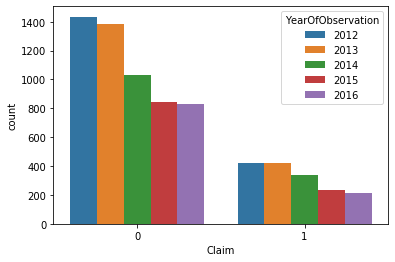

In [214]:
# Can we combine the above metrics in a single plot?
sns.countplot(x='Claim', data=train_data, hue ='YearOfObservation')

In [215]:
pd.pivot_table(train_data,index = ['Residential'], values = 'Customer Id', columns=['Claim'],aggfunc='count')

Claim,0,1
Residential,,
0,3926,1047
1,1600,587


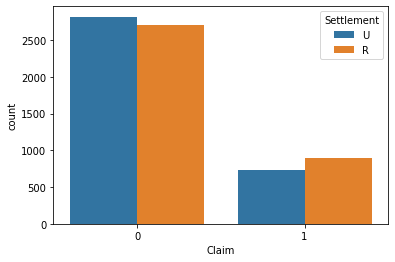

In [216]:
sns.countplot(x='Claim', data=train_data, hue ='Settlement')

In [217]:
#separate the target variable from independent variables
y_train = train_data['Claim']

train_data.drop('Claim',axis=1,inplace=True)

#combine the datasets for preprocessing
combined_data = pd.concat([train_data,test_data],axis=0)
combined_data.shape

(10229, 13)

In [218]:
#check how many missing values are  there in each column
combined_data.isnull().sum()

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                  11
Settlement               0
Building Dimension     119
Building_Type            0
Date_of_Occupancy     1236
NumberOfWindows          0
Geo_Code               115
dtype: int64

In [219]:
#fill missing values with mode value
combined_data['Garden'].fillna(combined_data['Garden'].mode()[0],inplace=True)

In [220]:
#fill missing values with None
combined_data['Date_of_Occupancy'].fillna('None',inplace=True)

In [221]:
#fill missing values with mean
combined_data['Building Dimension'].fillna(combined_data['Building Dimension'].mean(),inplace=True)

In [222]:
#fill missing values with mode value
combined_data['Geo_Code'].fillna(combined_data['Geo_Code'].mode()[0],inplace=True)

In [223]:
#replace  . in the NumberOfWindows with None since it means they are missing value
combined_data['NumberOfWindows'].replace(('   .'), 'None', inplace=True)

In [224]:
#confirm there are no missing values 
combined_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [225]:
#drop ID column
combined_data.drop(columns=['Geo_Code','Customer Id'], axis=1 ,inplace=True)

In [226]:
#get categorical columns
cat_cols = combined_data.dtypes[combined_data.dtypes=='object'].index

In [227]:
cat_cols

Index(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Date_of_Occupancy', 'NumberOfWindows'],
      dtype='object')

In [228]:
#apply one-hot encoding to categorical features
combined_data_converted = pd.get_dummies(data=combined_data, columns=cat_cols)

In [229]:
combined_data_converted

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,...,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_>=10,NumberOfWindows_None
0,2013,1.0,0,290.000000,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2015,1.0,0,490.000000,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2014,1.0,0,595.000000,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2013,1.0,0,2840.000000,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,1.0,0,680.000000,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2015,1.0,0,1818.152918,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3065,2012,1.0,0,1818.152918,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3066,2012,1.0,0,1818.152918,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3067,2013,1.0,0,1818.152918,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [230]:
#check new shape of the data
combined_data_converted.shape

(10229, 164)

In [231]:
#split the data back into train and test
x_train = combined_data_converted.iloc[:len(train_data)]
x_test = combined_data_converted.iloc[len(train_data):]

In [232]:
x_train

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,...,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_>=10,NumberOfWindows_None
0,2013,1.000000,0,290.000000,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2015,1.000000,0,490.000000,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2014,1.000000,0,595.000000,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2013,1.000000,0,2840.000000,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,1.000000,0,680.000000,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,2012,1.000000,1,1818.152918,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7156,2013,1.000000,0,1818.152918,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7157,2016,0.038251,0,1818.152918,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7158,2013,1.000000,0,1818.152918,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [233]:
x_test

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,...,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_>=10,NumberOfWindows_None
0,2013,1.000000,0,300.000000,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2016,0.997268,0,300.000000,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,2013,0.369863,0,790.000000,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,1.000000,0,1405.000000,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,2016,1.000000,0,1405.000000,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2015,1.000000,0,1818.152918,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3065,2012,1.000000,0,1818.152918,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3066,2012,1.000000,0,1818.152918,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3067,2013,1.000000,0,1818.152918,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [234]:
from sklearn.preprocessing import  StandardScaler

normalizer = StandardScaler()

In [235]:
#Create a cross-validation function
n_folds = 5
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

def accuracy_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    accuracy= cross_val_score(model, x_train.values, y_train, scoring="accuracy", cv = kf)
    return accuracy

In [236]:
#We start off by a logistic regressor
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=101, solver='liblinear')

In [237]:
score = accuracy_cv(log_reg)
print("Logistic regression score: {:.4f} ".format(score.mean()))

Logistic regression score: 0.7832 


In [238]:
#fit the model
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [239]:
#make predictions
predictions = log_reg.predict(x_test)

In [240]:
predictions
y = np.asarray(predictions) 
print(y)

[0 0 0 ... 0 0 0]


In [241]:
#count number of claims and no claims
np.asarray(np.unique(predictions,return_counts=True)).T

array([[   0, 2942],
       [   1,  127]], dtype=int64)

In [283]:
#model.predict([[20,500000]])
#log_reg.predict([[x_test[0]]])
#df=x_train.head(20)
list_a=x_test.to_numpy()[1990]
print("INPUT LIST:::",list_a)
number_of_elements = len(list_a)
print("Total input size:::",number_of_elements)
results=log_reg.predict([list_a])
results[0]
print("CLAIMS OR NOT:::",results[0])
final=results[0]
if final==0:
    print("SORRY !!!! Building has no claim")
elif final==1:
    print("Congratulations !!!! Building has claim")

INPUT LIST::: [2012.    1.    0. 1643.    3.    0.    1.    0.    1.    0.    1.    0.
    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 

In [263]:
#170,180=1